In [1]:
https://www.kaggle.com/saibharath12/online-shoppers-intention/data
https://www.kaggle.com/rekhadevi/dataanalysis-shoppers-intention-prediction
https://www.kaggle.com/roshansharma/online-shopper-s-intention
https://github.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/blob/master/online-shoppers-intention.ipynb

SyntaxError: invalid syntax (<ipython-input-1-71b426368a53>, line 1)

# Online Shoppers Intention

### Objectives
- Explore which customer activities affect the conversion of revenue.  
- Build model to predict whether a customer will generate revenue or not.

### Data Description
- Dependent variable (y): "Revenue": Revenue will be generated or not
- Independent variables (x):
    - Numerical variables:
        - "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": different types of pages visited by the visitor in that session and total time spent in each of these page categories.
        -  "Bounce Rate": the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
        - "Exit Rate": is calculated as for all pageviews to the page, the percentage that were the last in the session.
        - "Page Values": average value for a web page that a user visited before completing an e-commerce transaction.
        - "Special Day": closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
    - Categorical variables:
        - "Month": Month of the year
        - "OperatingSystems": Operating system used
        - "Browser": Browser used
        - "Region": Region of the user
        - "Traffic Type": Traffic Type
        - "Visitor Type": Visitor type (returning/ new visitor)
        - "Weekend": whether the date of the visit is weekend or not

In [3]:
#import libraries
import pandas as pd
import pandas_profiling
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Ninh/Programming/Python/Online Shoppers Intention/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#missing percentage
missing_percentage = df.isnull().sum().sum()/len(df)
print("Missing percentage:",missing_percentage)

Missing percentage: 0.009083536090835361


Not much data is missing, we consider dropping these observations.

In [7]:
#drop missing values
df.dropna(inplace = True)

In [8]:
#final data
print("Final data has the shape of",df.shape)

Final data has the shape of (12316, 18)


In [10]:
# categorize independent variables into categorical and numerical
numerical = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
             'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']

In [11]:
print(len(numerical))
print(len(categorical))

10
7


## 2. Exploratory Analysis 

#### 2.1. Univariate Analysis

#### 2.1.1. Dependent variable 

In [ ]:
# Customer Purchase Decision: buy or not
revenue = df['Revenue'].value_counts()
plt.figure(figsize=(7,7))
x = revenue.index
y = revenue.values
plt.pie(y,labels=x,startangle=90, autopct = "%.1f%%", textprops={'fontsize': 14})
plt.title("Revenue: Buy Or Not", fontsize = 15)

#### 2.1.2. Independent variables 

#### 2.1.2.1. Numerical variables 

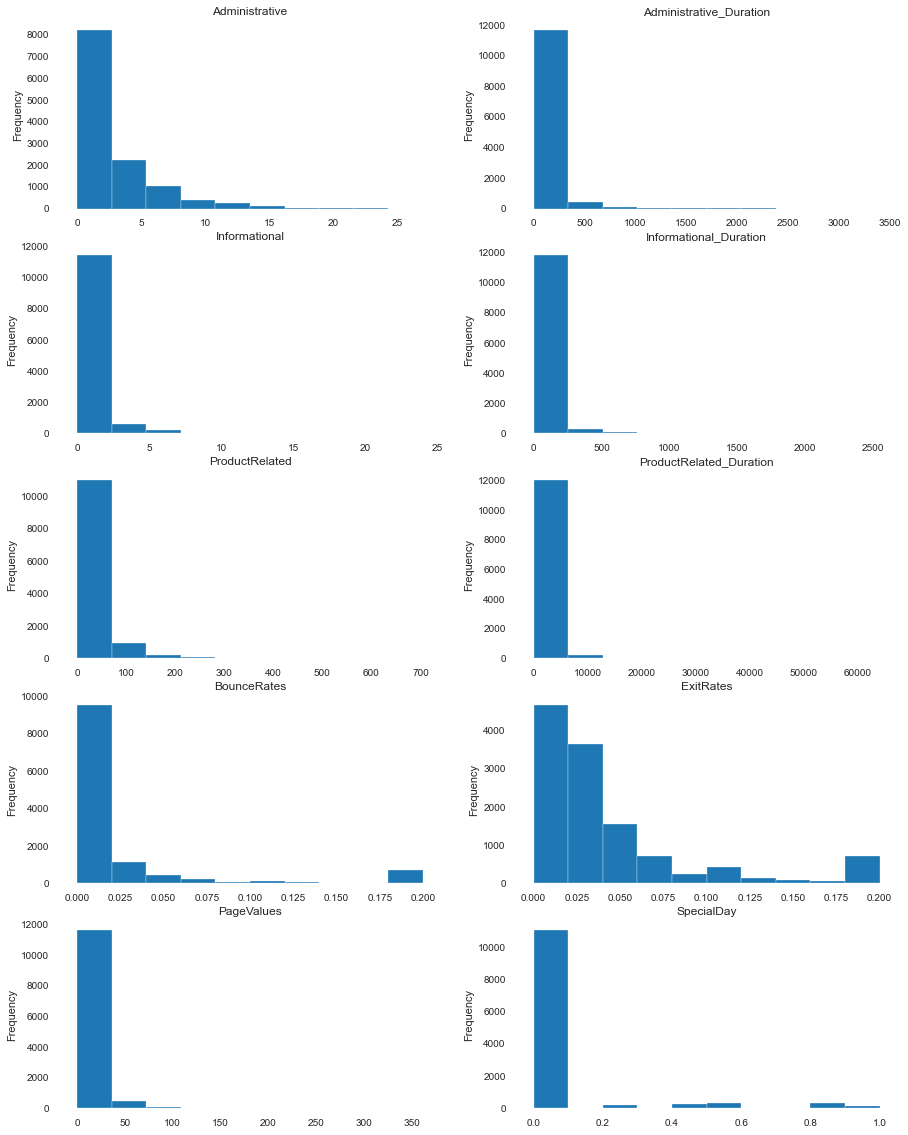

In [25]:
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(numerical):
    ax=plt.subplot(5,2,i+1) 
    df[col].plot.hist(ax = ax).tick_params(axis = 'x',labelrotation = 360)
    plt.title(col)
plt.show()

- Most variables are right skewed. 
- 'BounceRates' and "ExitRates' witness some extreme values. 

#### 2.1.2.2. Categorical variables 

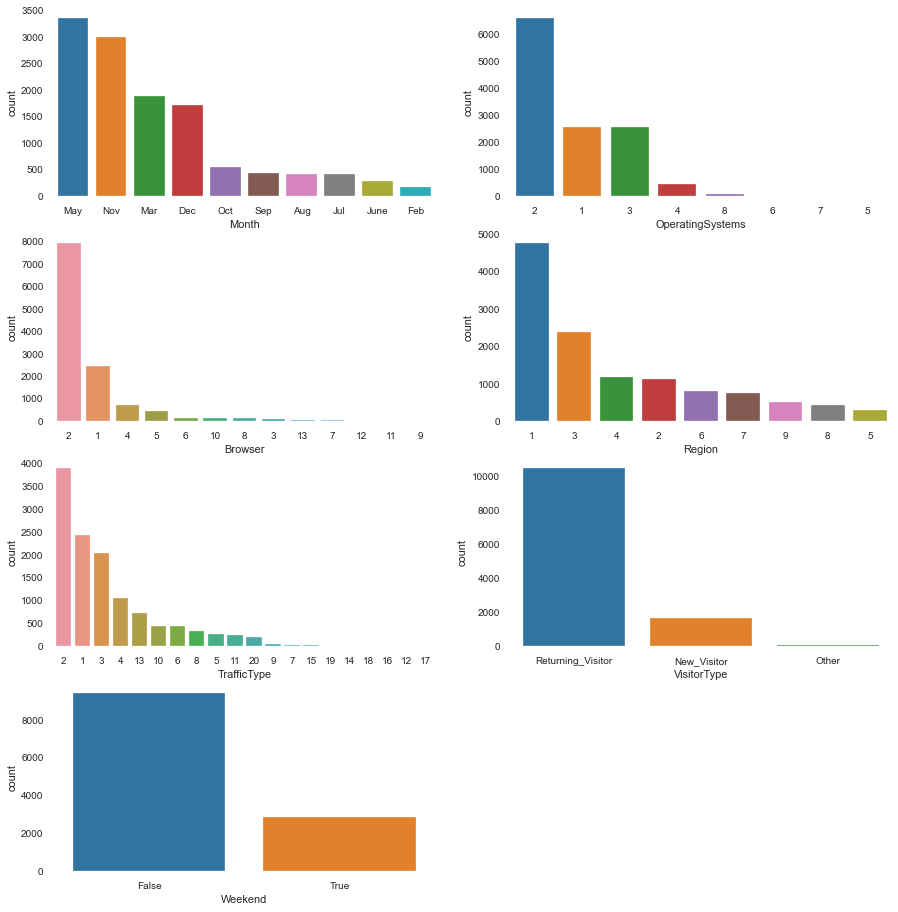

In [20]:
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(categorical):
    ax=plt.subplot(5,2,i+1) 
    sns.countplot(df[col],ax = ax,order = df[col].value_counts().index).tick_params(axis = 'x',labelrotation = 360)
plt.show()

Findings:
- Most observations are in May and November. 
- Customers mostly come from Operating System 2, Browser 2, Region 1, Traffic Type 2 and 3. Most customers are returning customers and they visit the site on weekday.

#### 2.2. Bivariate Analysis

#### 2.2.1. Revenue vs. Numerical Variables

#### 2.2.2. Revenue vs. Categorical Variables

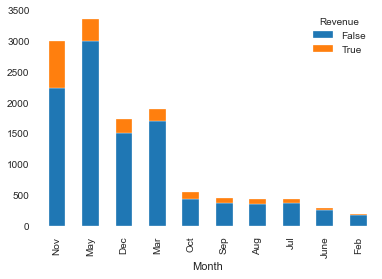

In [87]:
data = pd.crosstab(df['Month'], df['Revenue']).sort_values(by=True,ascending=False)
data.plot(kind='bar',stacked=True)

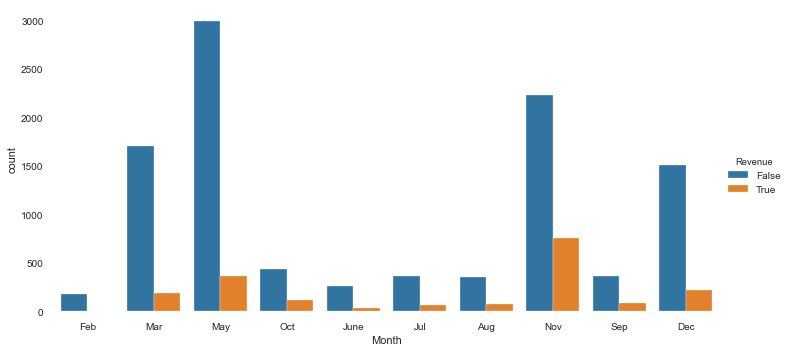

In [61]:
#Revenue vs. Month

sns.catplot('Month',hue='Revenue', data = df, kind='count', height = 5, aspect = 2)

In [ ]:
#Revenue vs. Operating Systems


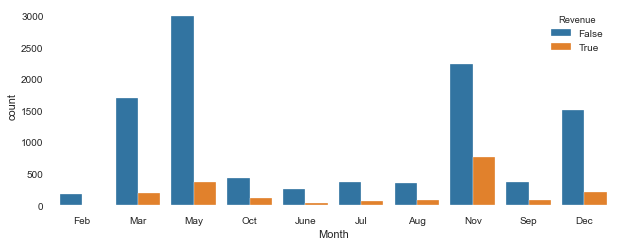

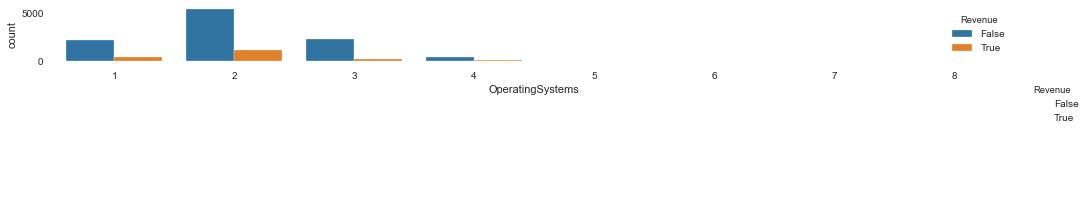

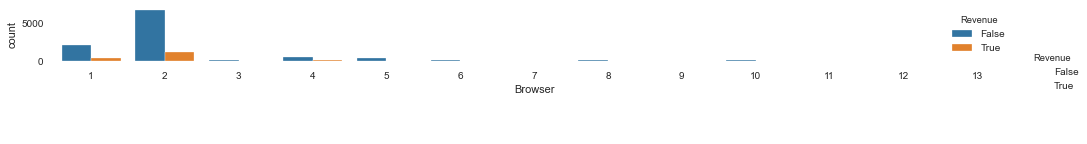

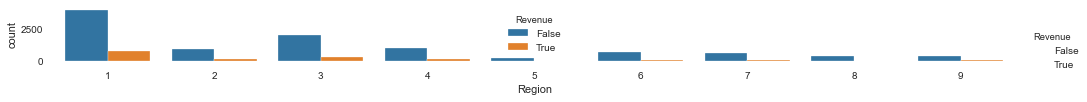

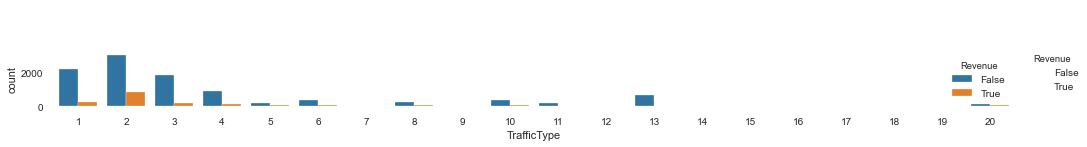

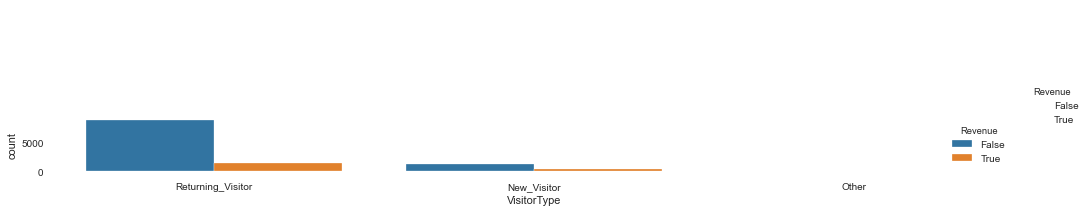

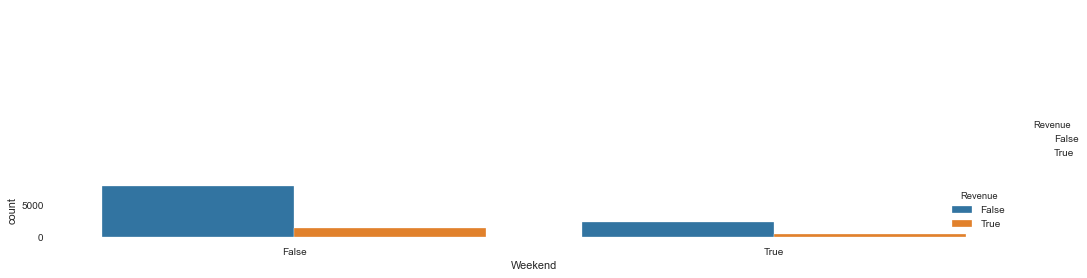

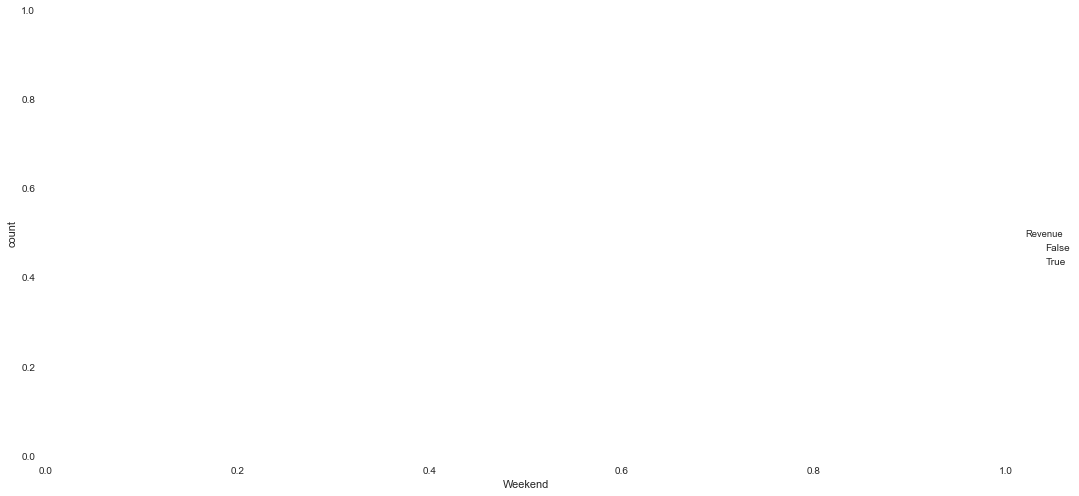

In [60]:
#categorical variables
fig = plt.figure(figsize = (10,30))
for i, col in enumerate(categorical):
    ax = plt.subplot(7,1,i+1)
    sns.catplot(col,hue='Revenue', data = df, kind='count', ax=ax, height = 7, aspect = 2)
plt.show()